In [2]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import missingno as msno 
import streamlit as st 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100



In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
df.shape

(21613, 21)

<AxesSubplot:>

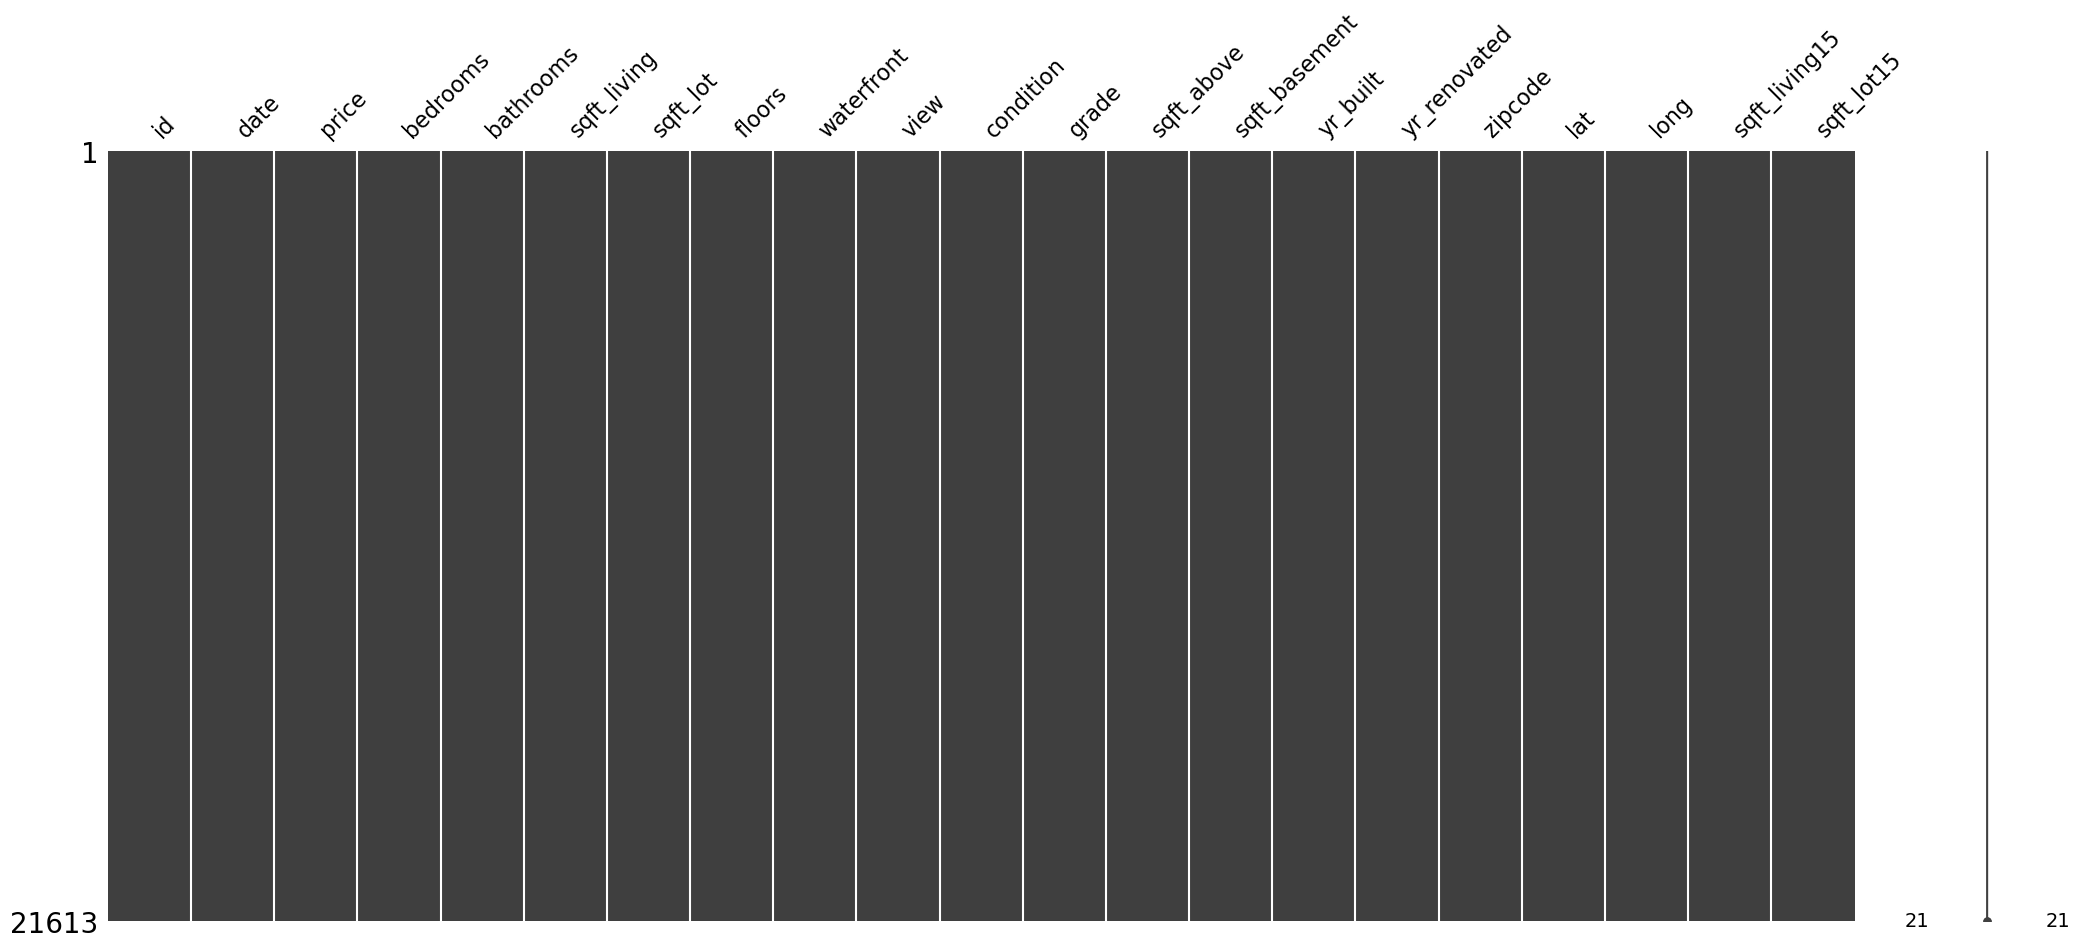

In [5]:
msno.matrix(df)

In [6]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

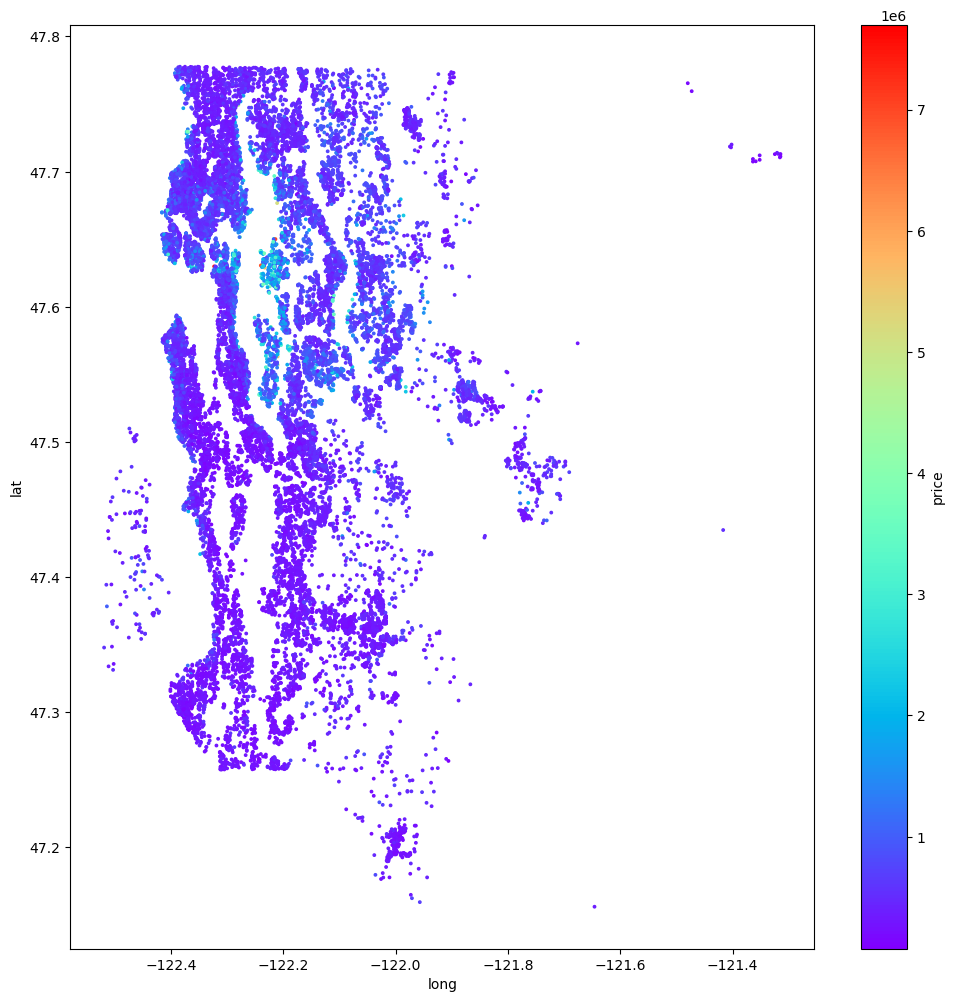

In [7]:
df.plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(12,12))

<AxesSubplot:xlabel='long', ylabel='lat'>

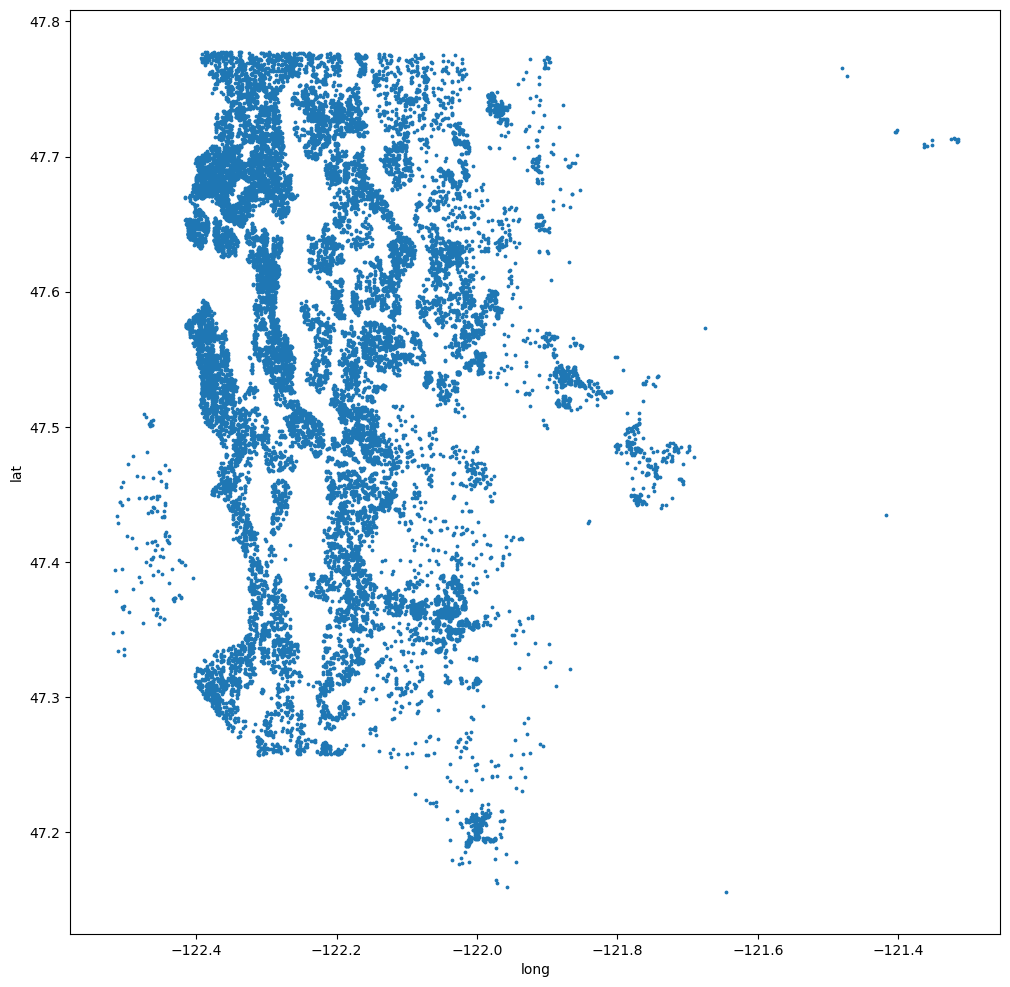

In [8]:
df.plot(kind="scatter", x="long", y="lat", cmap="rainbow", s=3, figsize=(12,12))

<AxesSubplot:xlabel='long', ylabel='lat'>

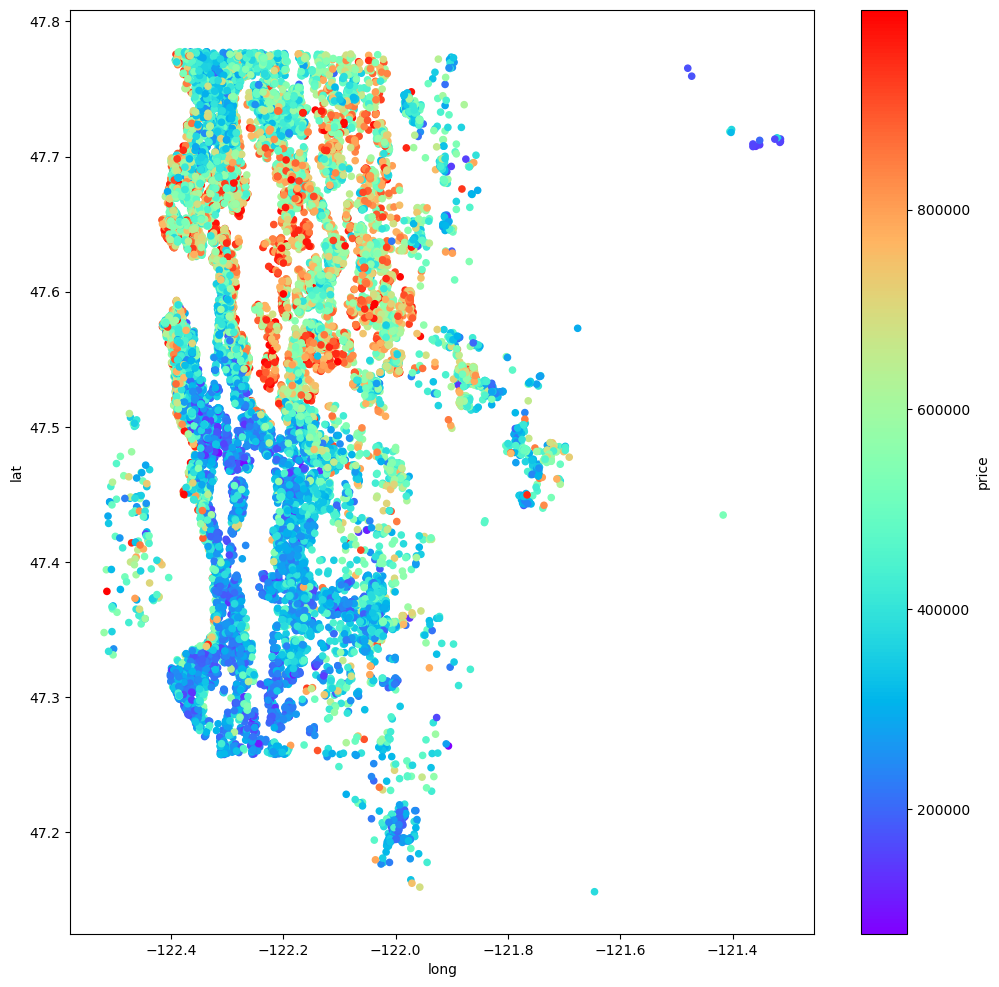

In [9]:
df[df.price < 1000000].plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", figsize=(12,12))

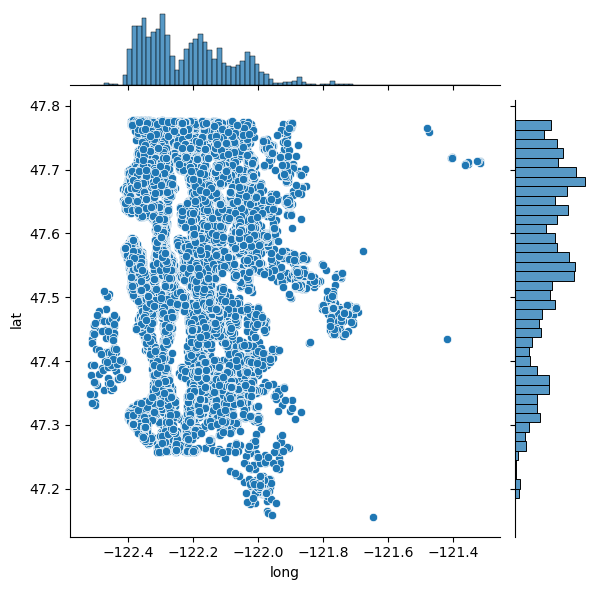

In [10]:
sns.jointplot(data=df, x="long", y="lat")

In [11]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

<AxesSubplot:xlabel='year,month'>

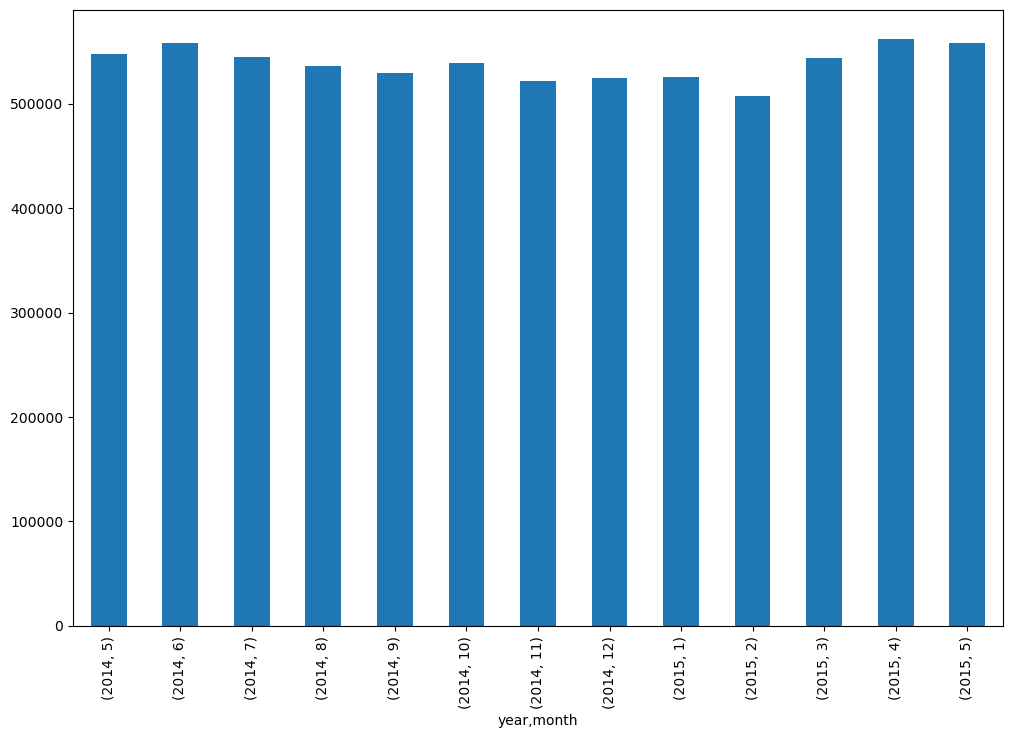

In [12]:

df.groupby(['year','month'])['price'].mean().plot(kind = 'bar', figsize=(12,8))

<AxesSubplot:xlabel='year,month'>

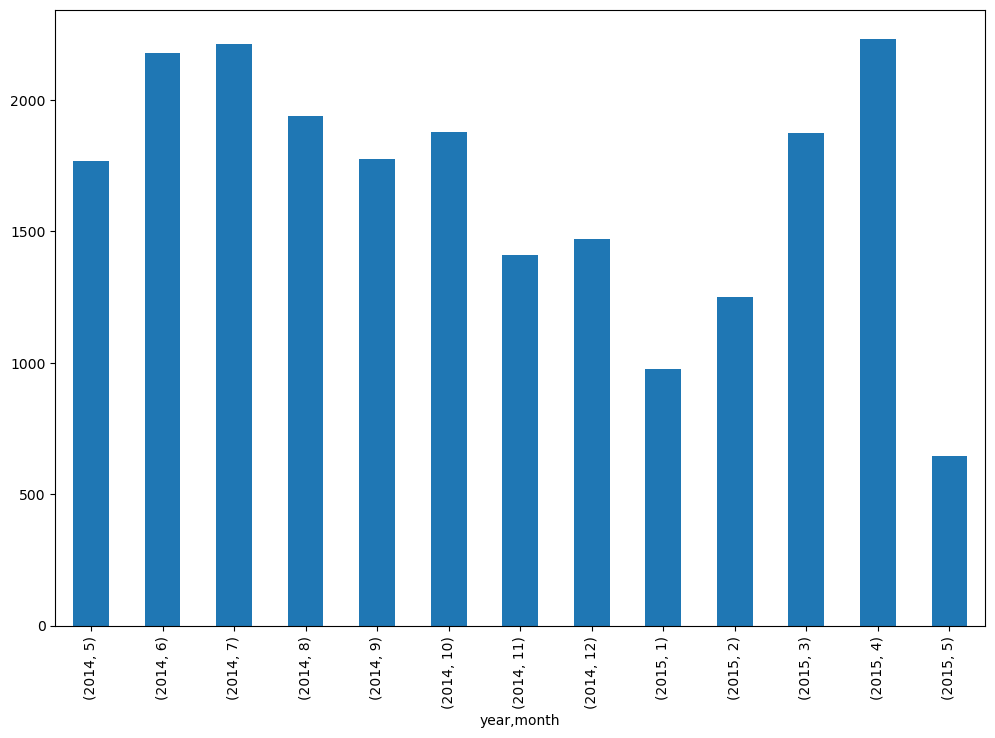

In [13]:
df.groupby(['year','month'])['price'].count().plot(kind = 'bar', figsize=(12,8))

In [14]:
df = df.drop(['id','date'], axis=1)

In [15]:
df.groupby(['bedrooms']).mean()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
bedrooms,,,,,,,,,,,,,,,,,,,,
0,4.095038e+05,0.826923,1707.846154,24141.307692,1.961538,0.000000,0.307692,2.846154,6.692308,1707.846154,0.000000,1983.846154,0.000000,98066.692308,47.511415,-122.150231,2036.923077,26097.076923,2014.307692,7.153846
1,3.176429e+05,1.066583,884.613065,16285.673367,1.150754,0.025126,0.246231,3.266332,6.100503,823.859296,60.753769,1942.663317,169.638191,98103.417085,47.567169,-122.256854,1449.567839,14240.221106,2014.306533,6.899497
2,4.013727e+05,1.401721,1239.752899,12096.726087,1.306703,0.011232,0.178623,3.377899,6.871739,1107.240942,132.511957,1955.413043,81.382609,98105.953623,47.588601,-122.278570,1503.785507,9693.109058,2014.331884,6.593116
3,4.662321e+05,1.968394,1805.837235,14414.790208,1.449410,0.006515,0.187805,3.415513,7.472516,1584.442284,221.394951,1971.812602,76.001425,98076.478217,47.551478,-122.213344,1835.443506,12809.343648,2014.326954,6.549267
4,6.354195e+05,2.436428,2554.649666,16720.793374,1.616100,0.005812,0.268091,3.406568,8.116681,2198.300639,356.349026,1976.594740,87.112467,98069.749201,47.556118,-122.189139,2291.124818,13727.256030,2014.313572,6.595176
5,7.865998e+05,2.778576,3047.545284,16769.022486,1.579638,0.011868,0.409744,3.449094,8.272330,2407.566521,639.978763,1974.204872,101.061836,98070.188007,47.574169,-122.201242,2442.706433,13089.471580,2014.324797,6.589631
6,8.255206e+05,3.068015,3284.341912,18586.930147,1.606618,0.014706,0.544118,3.470588,8.080882,2494.386029,789.955882,1963.036765,168.573529,98079.463235,47.580421,-122.240728,2280.176471,14756.878676,2014.352941,6.319853
7,9.511847e+05,3.651316,3974.210526,20840.552632,1.723684,0.000000,0.500000,3.447368,8.447368,3160.263158,813.947368,1962.842105,210.657895,98085.815789,47.609024,-122.240711,2335.263158,15811.289474,2014.210526,6.631579
8,1.105077e+06,3.557692,3800.000000,8971.615385,1.692308,0.000000,0.230769,3.538462,8.076923,2660.769231,1139.230769,1956.307692,0.000000,98081.846154,47.630008,-122.268769,2265.384615,7355.923077,2014.153846,8.384615


In [17]:
df.loc[df['bedrooms'] > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,2014,8
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6


In [18]:
df = df.assign(surface_liv = df.sqft_living * 0.092903)

In [19]:
moy = df.groupby(['zipcode']).mean()
moy['sqm2_living'] = moy['sqft_living'] / 3.28
moy['m2'] = moy['price'] / moy['sqm2_living']
moy[['price','sqft_living', 'sqm2_living', 'm2']].nlargest(5, columns='m2')

,price,sqft_living,sqm2_living,m2
zipcode,,,,
98039,2.160607e+06,3800.900000,1158.810976,1864.503051
98004,1.355927e+06,2909.022082,886.896976,1528.843956
98112,1.095499e+06,2498.743494,761.812041,1438.017888
98109,8.796236e+05,2054.779817,626.457261,1404.123918
98119,8.494480e+05,2005.614130,611.467723,1389.195185


In [20]:
df['surface_liv']

0        109.62554
1        238.76071
2         71.53531
3        182.08988
4        156.07704
           ...    
21608    142.14159
21609    214.60593
21610     94.76106
21611    148.64480
21612     94.76106
Name: surface_liv, Length: 21613, dtype: float64

In [21]:
df.groupby(['surface_liv','price']).all()

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
surface_liv,price,,,,,,,,,,,,,,,,,,,,
26.941870,142000.0,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
34.374110,276000.0,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
35.303140,245000.0,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
35.674752,265000.0,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
36.232170,228000.0,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895.584920,4668000.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
918.810670,6885000.0,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True
932.746120,7062500.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [22]:
df.loc[df['surface_liv'] > 700]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,2014,10,744.15303
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015,4,743.22400
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6,932.74612
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014,8,854.70760
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10,1119.48115
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,2014,6,895.58492
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014,9,918.81067
12777,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2014,5,1257.90662
13411,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,2015,1,732.07564
14032,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809,2014,11,707.92086


In [23]:
df.drop(df[df['bedrooms'] < 1].index, inplace= True)

In [24]:
df.shape

(21600, 22)

<AxesSubplot:>

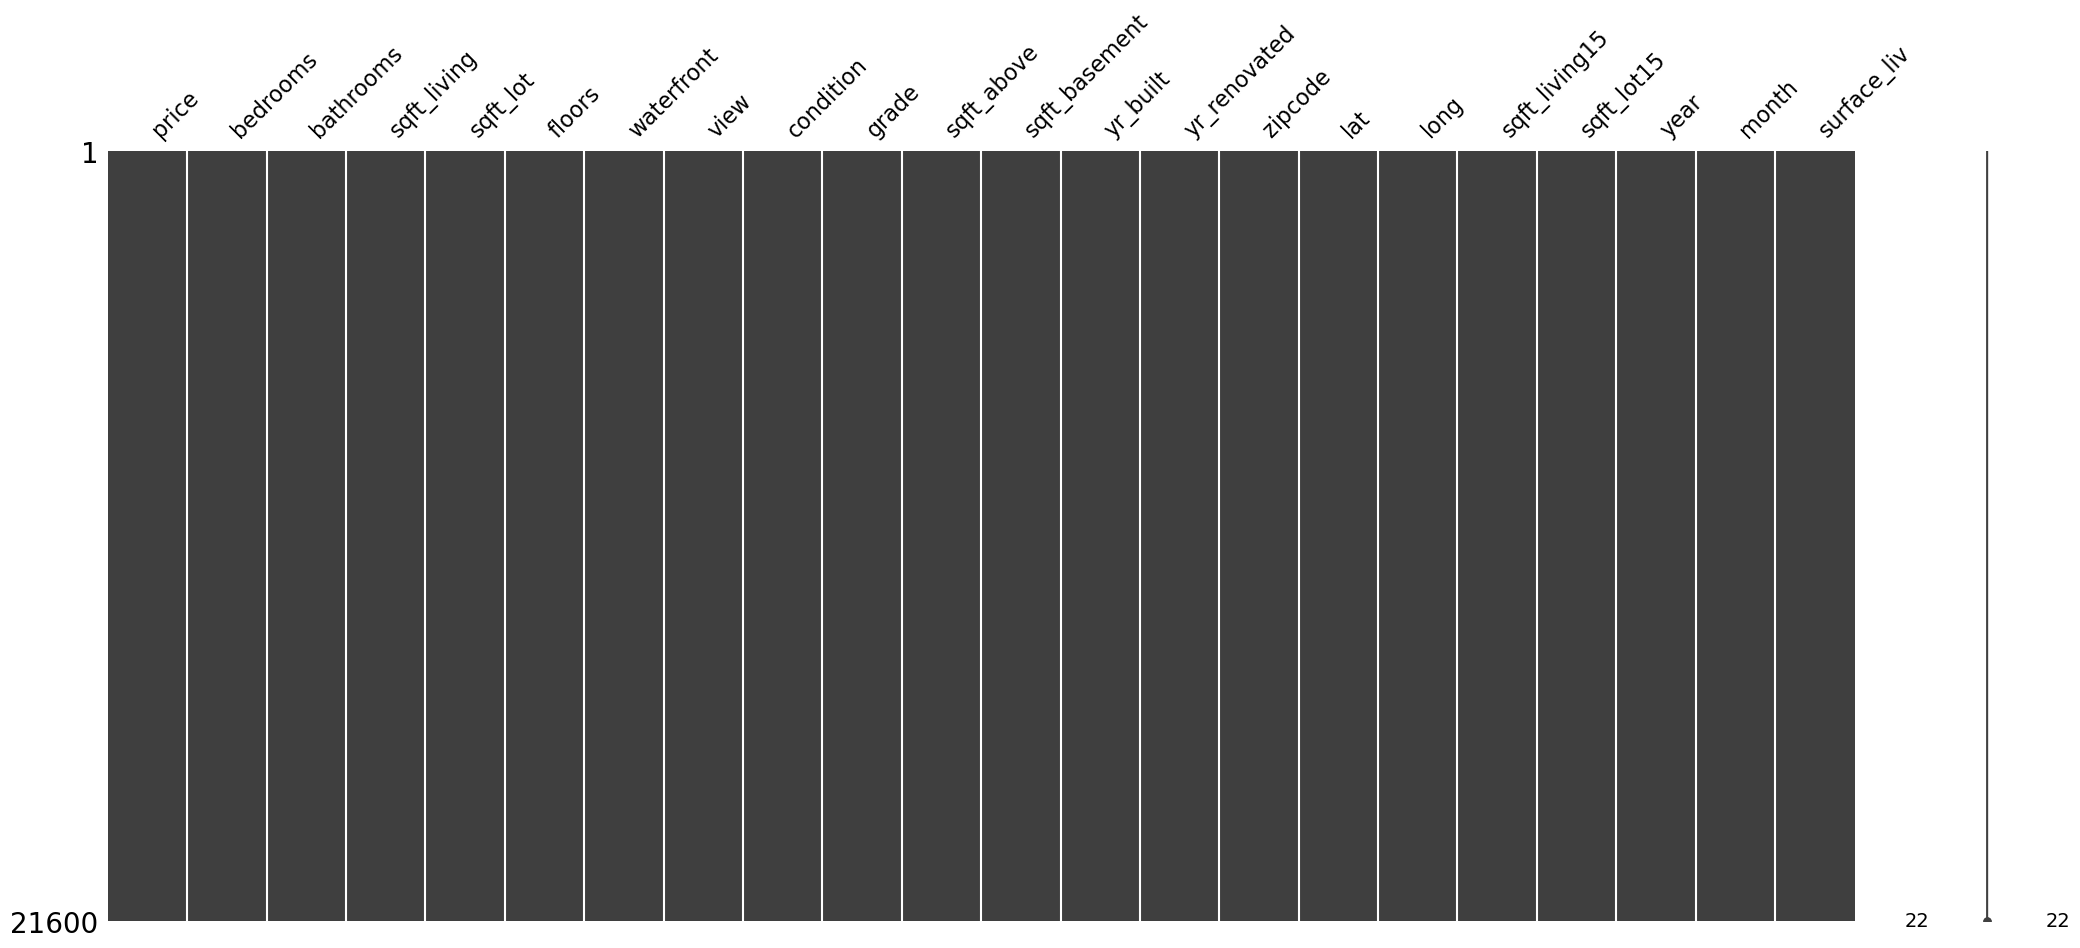

In [25]:
msno.matrix(df)

In [26]:
df.loc[df['yr_renovated'] >0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,238.760710
35,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,2014,6,213.676900
95,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,2014,9,306.579900
103,1088000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,2014,10,271.276760
115,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,2014,11,406.915140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,1150000.0,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,2015,1,163.509280
20057,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,2014,9,141.212560
20444,500012.0,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,2015,2,222.967200
20447,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,2015,2,93.832030


In [27]:
df.shape

(21600, 22)

In [28]:
df.groupby(['zipcode']).min()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,100000.0,1,0.75,770,2064,1.0,0,0,2,5,770,0,1903,0,47.2576,-122.294,828,2855,2014,1,71.53531
98002,95000.0,1,0.75,690,2800,1.0,0,0,3,5,690,0,1908,0,47.2761,-122.229,860,2800,2014,1,64.10307
98003,128000.0,1,1.00,760,1302,1.0,0,0,2,6,760,0,1927,0,47.2574,-122.334,970,1302,2014,1,70.60628
98004,425000.0,2,1.00,860,779,1.0,0,0,1,6,820,0,1908,0,47.5806,-122.229,1290,794,2014,1,79.89658
98005,400000.0,2,1.00,980,2551,1.0,0,0,2,6,920,0,1943,0,47.5830,-122.185,1440,2601,2014,1,91.04494
98006,247500.0,2,0.75,930,1960,1.0,0,0,1,6,680,0,1911,0,47.5380,-122.197,1060,2511,2014,1,86.39979
98007,295000.0,2,1.00,970,1962,1.0,0,0,3,7,880,0,1954,0,47.5647,-122.153,1250,2055,2014,1,90.11591
98008,250000.0,2,1.00,940,1055,1.0,0,0,3,6,660,0,1942,0,47.5692,-122.132,990,1340,2014,1,87.32882
98010,135000.0,1,0.75,520,4814,1.0,0,0,3,4,520,0,1900,0,47.2931,-122.053,820,6160,2014,1,48.30956


<AxesSubplot:xlabel='surface_liv', ylabel='price'>

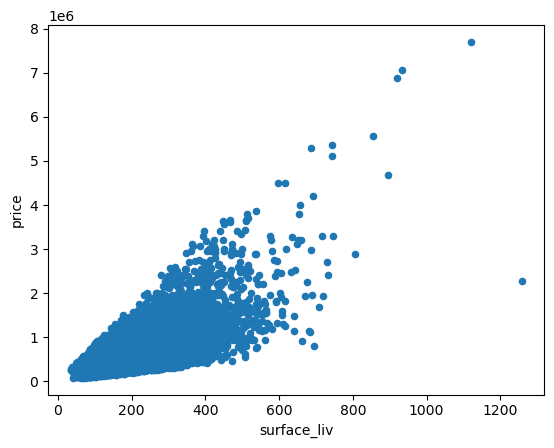

In [29]:
df.plot.scatter(x="surface_liv",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

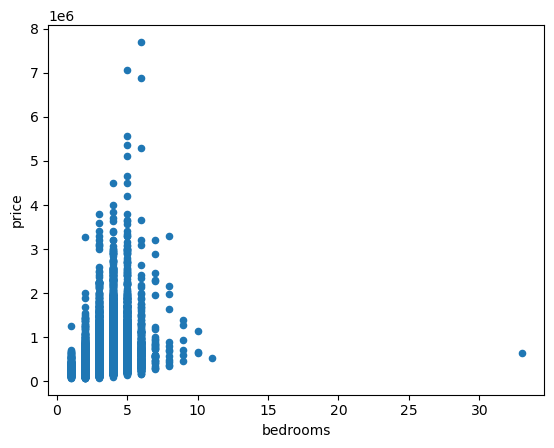

In [30]:
df.plot.scatter(x="bedrooms",y="price") 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

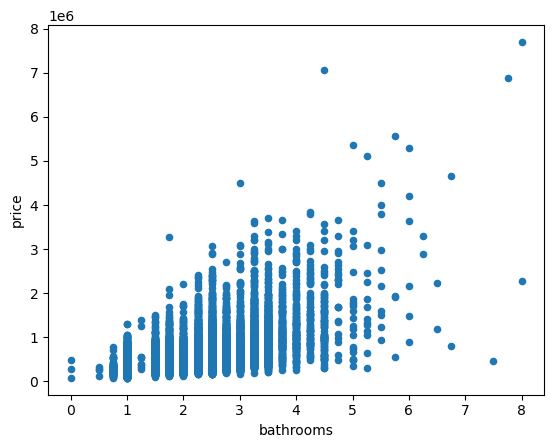

In [31]:
df.plot.scatter(x="bathrooms",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

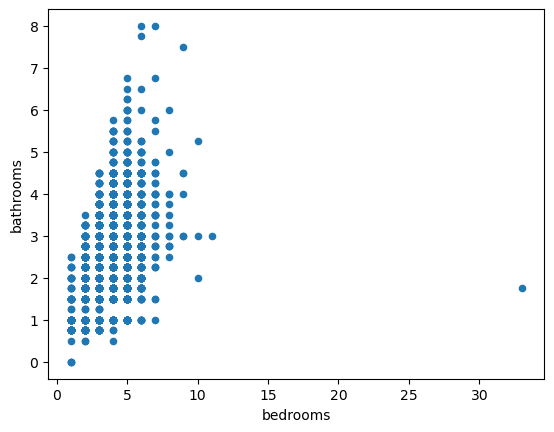

In [32]:
df.plot.scatter(x="bedrooms",y="bathrooms") 

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,109.62554
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,238.76071
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,71.53531
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,182.08988
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,156.07704


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

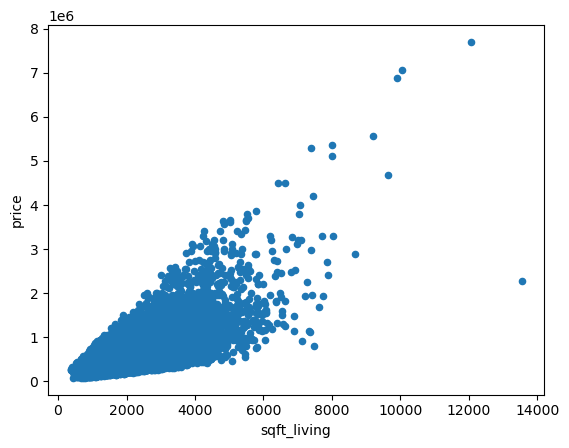

In [34]:
df.plot.scatter(x="sqft_living",y="price") 

<AxesSubplot:xlabel='view', ylabel='price'>

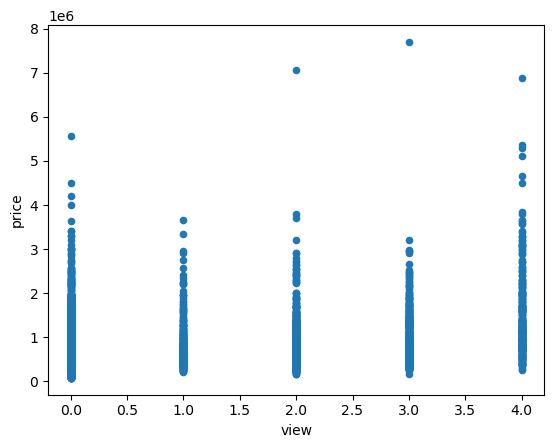

In [35]:
df.plot.scatter(x="view",y="price") 

In [36]:
df['surface_liv'].value_counts()

120.773900    138
130.064200    135
133.780320    133
93.832030     129
154.218980    129
             ... 
232.907821      1
918.810670      1
518.770352      1
182.182783      1
132.386775      1
Name: surface_liv, Length: 1034, dtype: int64

In [37]:
df['view'].value_counts()

0    19478
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [38]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4025, dtype: int64

In [39]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [40]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    404
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    308
98122    290
98146    288
98008    283
98028    283
98040    282
98198    280
98003    280
98031    273
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, dtype: int64

In [41]:
df['yr_renovated'].value_counts()

0       20686
2014       91
2013       37
2003       36
2005       35
2007       35
2000       35
2004       26
1990       25
2006       24
2002       22
2009       22
1989       22
1991       20
1998       19
2001       19
1994       19
1993       19
1987       18
2010       18
2008       18
1983       18
1984       18
1985       17
1999       17
1992       17
1986       17
2015       16
1995       16
1988       15
1996       15
1997       15
2011       13
2012       11
1980       11
1982       11
1979       10
1970        9
1977        8
1968        8
1978        6
1975        6
1973        5
1965        5
1981        5
1964        5
1958        5
1960        4
1972        4
1963        4
1969        4
1976        3
1974        3
1953        3
1955        3
1956        3
1945        3
1957        3
1950        2
1962        2
1940        2
1946        2
1971        2
1967        2
1934        1
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, 

In [42]:
df.rename(columns={"long": "Longitude", "lat": "Latitude"})

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15,year,month,surface_liv
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,109.62554
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,238.76071
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,71.53531
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,182.08988
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,156.07704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,142.14159
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,214.60593
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,94.76106
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,148.64480


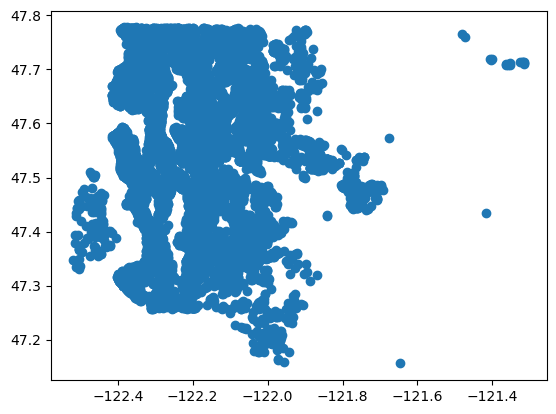

In [43]:
plt.scatter(x=df['long'],y=df['lat'] )
plt.show()  

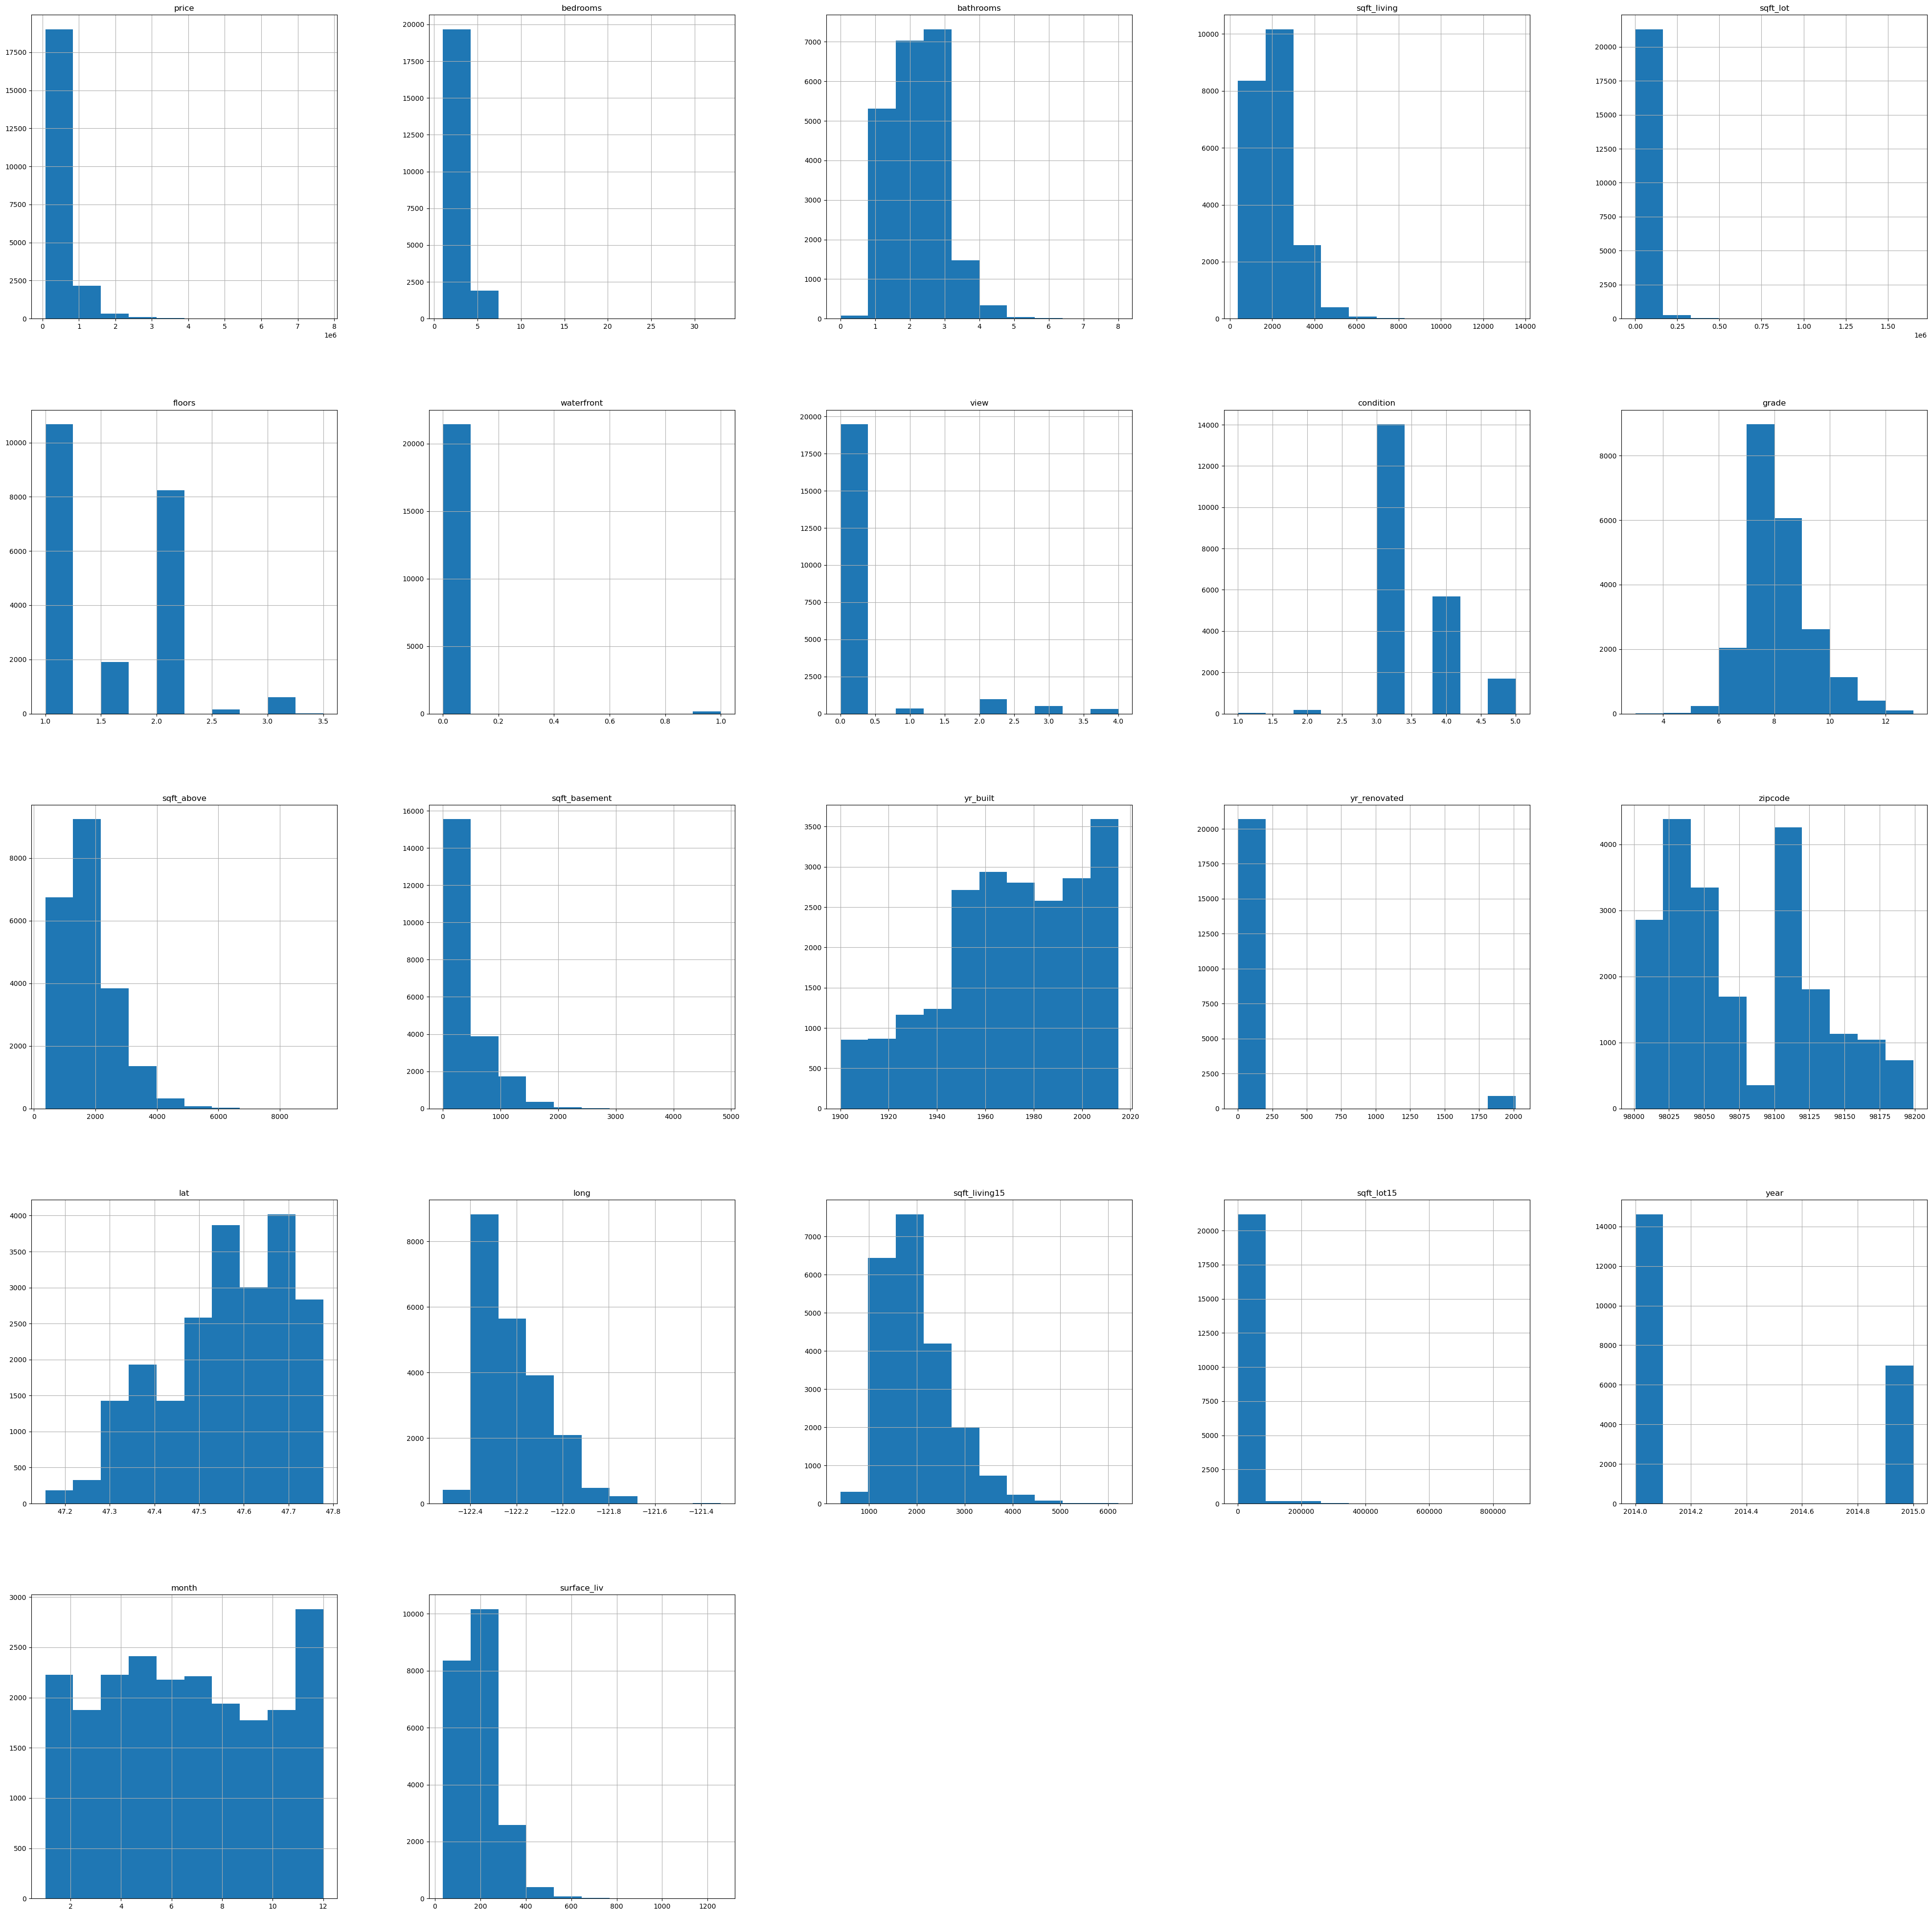

In [44]:
ax = df.hist(figsize=(50,50))

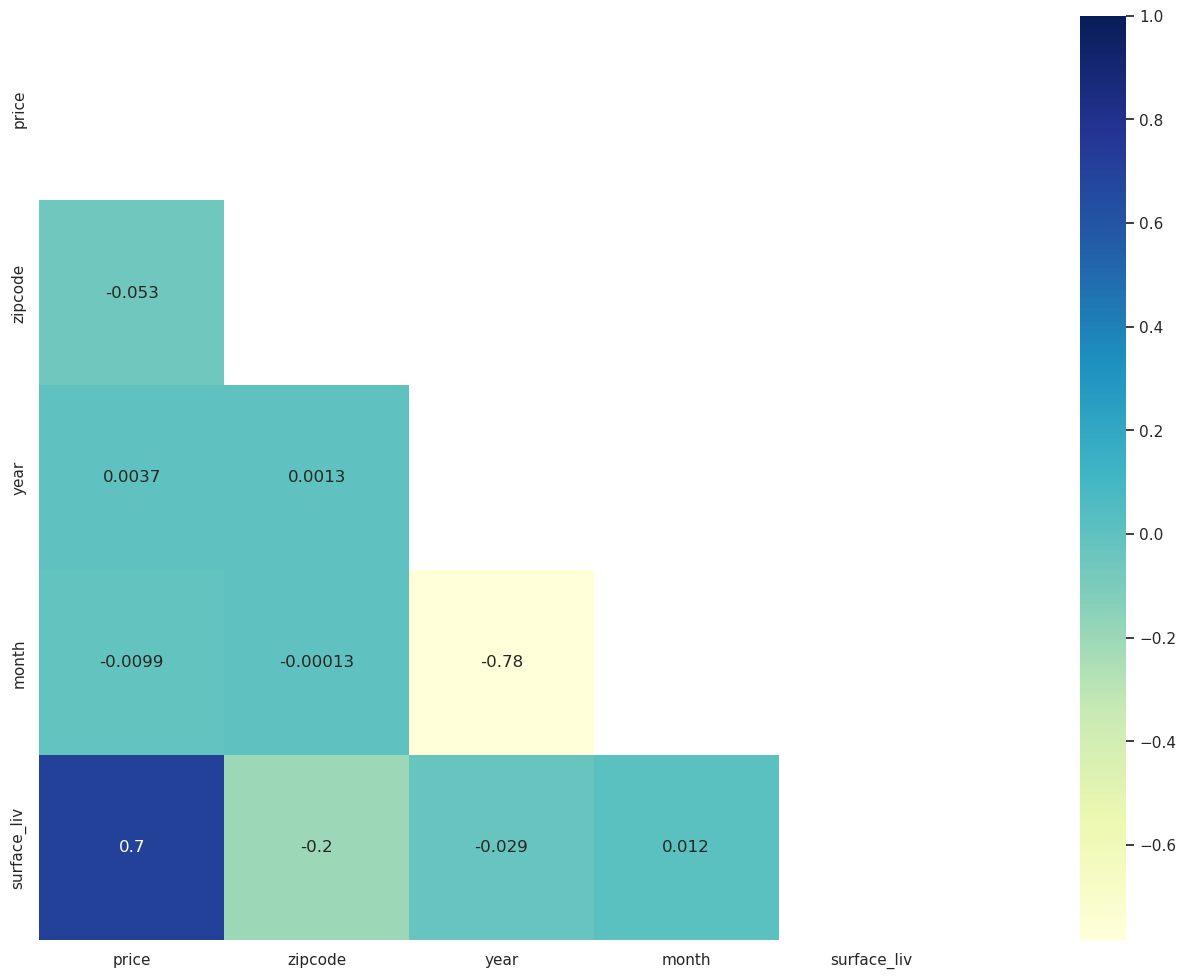

In [45]:
pearson = df.corr(method='pearson')
pearson = df.drop(['floors','waterfront','condition','lat','long', 'sqft_basement','view','sqft_above','bedrooms','bathrooms','sqft_lot','sqft_living','floors','sqft_living15','sqft_lot15','yr_built','yr_renovated','grade'],axis=1)
pearson = pearson.corr(method='pearson')
sns.set(rc={'figure.figsize':(30,12)})
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   ax = sns.heatmap(data=pearson, cmap="YlGnBu", mask=mask, vmax=1, annot=True, square=True)

In [46]:
df.shape

(21600, 22)

In [47]:
df = df.join(pd.get_dummies(df['zipcode']))

In [48]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,109.62554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,238.76071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,71.53531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,182.08988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,156.07704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df = df.drop('zipcode',axis=1)

In [50]:
df.shape

(21600, 91)

In [51]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,109.62554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,238.76071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,71.53531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,182.08988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,156.07704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df.corr().sort_values(by='price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,1.000000,0.308890,0.525874,0.701911,0.089827,0.256876,0.266432,0.397326,0.036120,0.667764,0.605398,0.323815,0.054019,0.126429,0.306855,0.021831,0.585289,0.082752,0.003691,-0.009921,0.701911,-0.091967,-0.080345,-0.076809,0.271188,0.065115,0.133703,0.016988,0.033061,-0.021642,-0.012951,-0.017500,-0.029606,-0.063985,-0.106159,0.007613,0.029181,-0.024382,0.024251,-0.072783,-0.073911,-0.060032,0.102557,-0.008114,-0.078938,0.212612,0.204911,-0.100365,-0.027887,0.047286,0.051320,-0.072025,-0.044968,-0.074544,-0.018896,-0.003466,-0.010209,0.009181,0.057194,0.088676,0.037363,-0.071854,0.068062,0.020641,0.090979,-0.075416,0.011828,-0.046835,0.065851,0.169871,0.036173,0.026623,0.016173,-0.051587,0.078089,0.029931,-0.026591,-0.040597,-0.063758,0.003484,0.018816,-0.057213,-0.035765,-0.046054,-0.022563,-0.091718,0.040496,-0.069287,-0.054442,-0.074072,0.083659
sqft_living,0.701911,0.578405,0.755827,1.000000,0.173342,0.354071,0.103856,0.284726,-0.059284,0.762707,0.876482,0.435186,0.318211,0.055344,0.052266,0.240536,0.756433,0.184183,-0.029010,0.012052,1.000000,-0.025039,-0.047510,-0.018877,0.110176,0.055607,0.135217,0.008999,0.006691,0.004268,0.017981,0.003132,0.009381,-0.028244,-0.015140,0.018788,0.065986,0.005346,0.027300,-0.014030,-0.018537,-0.028424,0.046866,-0.017779,0.012430,0.090273,0.128610,-0.017279,-0.001805,0.051021,0.080494,-0.036067,-0.009501,-0.004872,0.052437,0.065271,-0.015035,0.035926,0.088955,0.132564,0.081387,0.016173,0.005373,-0.079166,0.007943,-0.080958,-0.060876,-0.038115,-0.001966,0.051199,-0.044410,-0.030761,-0.068512,-0.065991,-0.007522,-0.037490,-0.050513,-0.075427,-0.077459,-0.042719,-0.023244,-0.058071,-0.026308,-0.046416,-0.001452,-0.074790,0.028952,-0.042332,-0.024045,-0.041783,0.010856
surface_liv,0.701911,0.578405,0.755827,1.000000,0.173342,0.354071,0.103856,0.284726,-0.059284,0.762707,0.876482,0.435186,0.318211,0.055344,0.052266,0.240536,0.756433,0.184183,-0.029010,0.012052,1.000000,-0.025039,-0.047510,-0.018877,0.110176,0.055607,0.135217,0.008999,0.006691,0.004268,0.017981,0.003132,0.009381,-0.028244,-0.015140,0.018788,0.065986,0.005346,0.027300,-0.014030,-0.018537,-0.028424,0.046866,-0.017779,0.012430,0.090273,0.128610,-0.017279,-0.001805,0.051021,0.080494,-0.036067,-0.009501,-0.004872,0.052437,0.065271,-0.015035,0.035926,0.088955,0.132564,0.081387,0.016173,0.005373,-0.079166,0.007943,-0.080958,-0.060876,-0.038115,-0.001966,0.051199,-0.044410,-0.030761,-0.068512,-0.065991,-0.007522,-0.037490,-0.050513,-0.075427,-0.077459,-0.042719,-0.023244,-0.058071,-0.026308,-0.046416,-0.001452,-0.074790,0.028952,-0.042332,-0.024045,-0.041783,0.010856
grade,0.667764,0.357145,0.666080,0.762707,0.114473,0.458790,0.082861,0.251661,-0.146277,1.000000,0.755963,0.168350,0.447706,0.014333,0.113893,0.199049,0.713779,0.120613,-0.030732,0.008970,0.762707,-0.040097,-0.079182,-0.011187,0.107103,0.062645,0.148881,0.021204,-0.000367,-0.014956,0.009505,-0.017499,-0.011790,-0.044513,-0.010781,-0.002335,0.063176,-0.004529,0.077231,-0.022706,-0.027001,-0.033369,0.050980,-0.020698,-0.008533,0.078063,0.127710,-0.032036,-0.003643,0.075183,0.072886,-0.050303,-0.035696,-0.011848,0.029880,0.021124,-0.023599,0.039720,0.129407,0.149600,0.092204,0.021283,0.037957,-0.035647,0.015958,-0.084653,-0.022128,-0.050914,0.021893,0.075084,-0.041928,-0.009311,-0.051827,-0.089951,0.028763,0.008682,-0.056971,-0.068873,-0.069482,-0.024060,-0.021927,-0.082638,

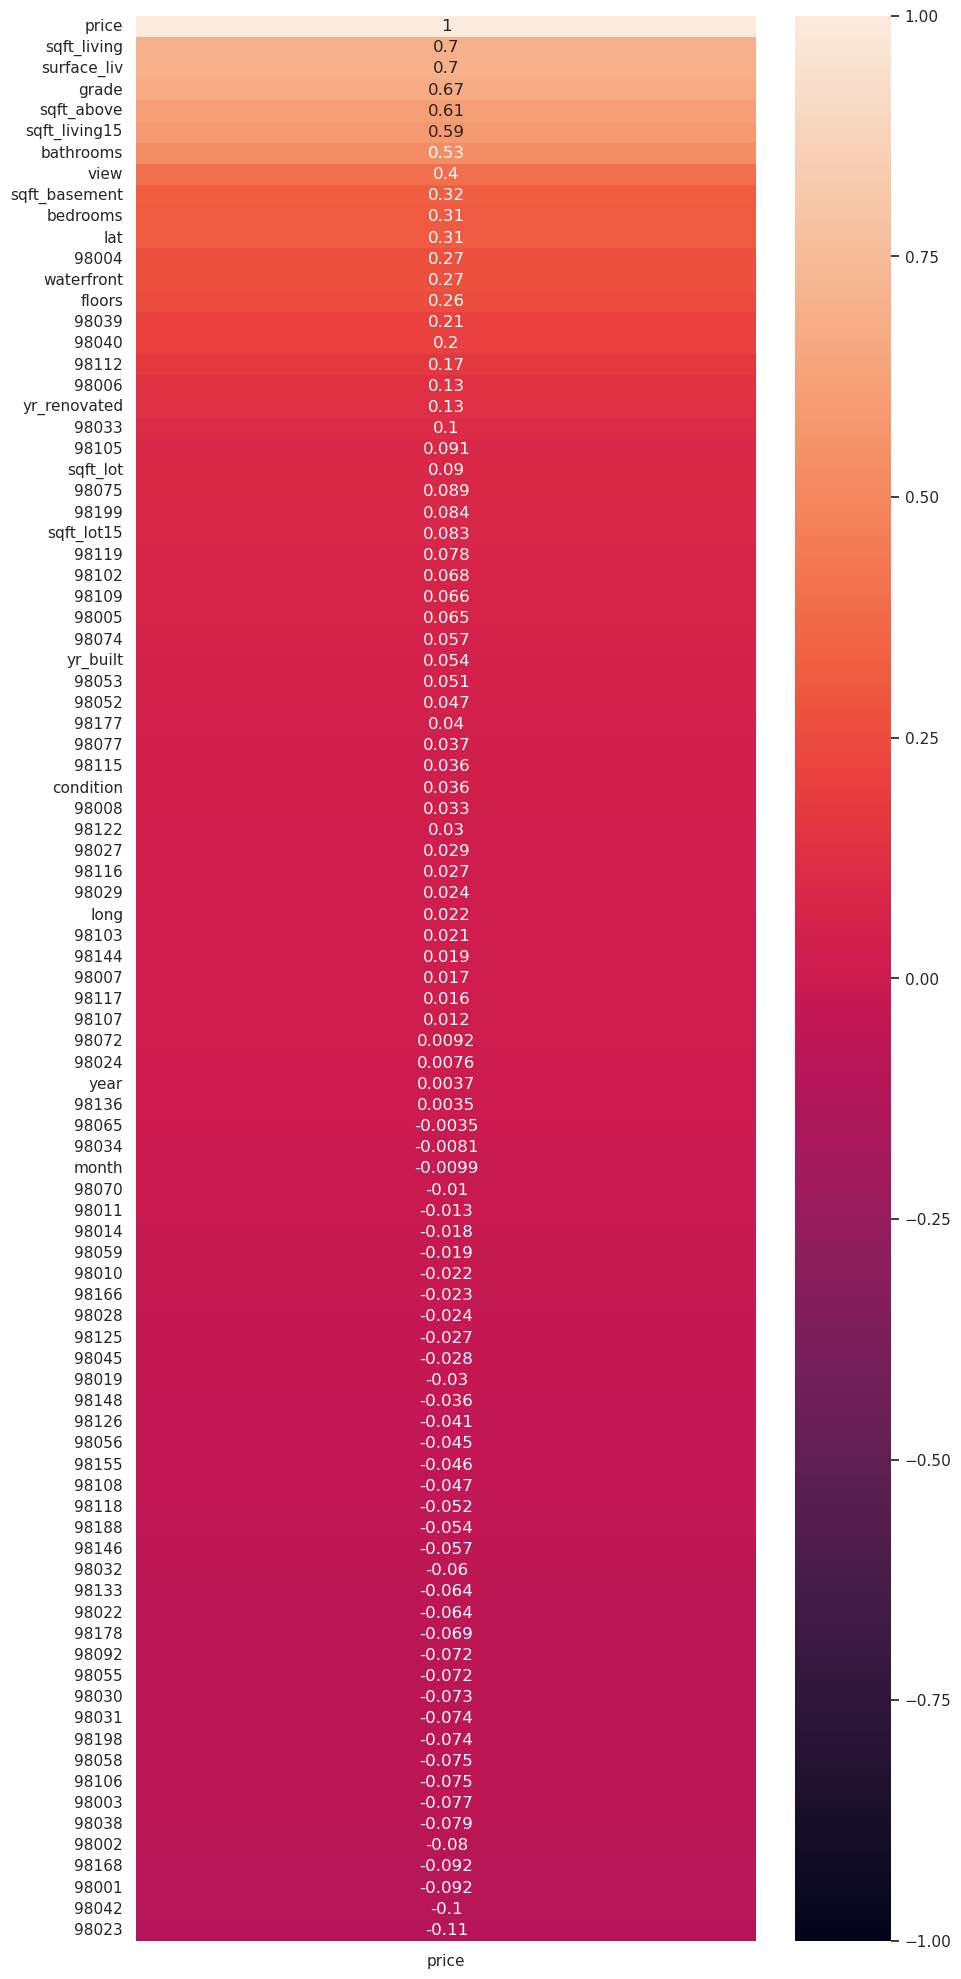

In [53]:
plt.figure(figsize=(10, 25))

heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)


In [54]:
df.drop(df[df['bedrooms'] < 1].index, inplace= True)

In [55]:
df.drop(df[df['bathrooms'] < 0.75].index, inplace= True)

In [56]:
df.drop(df[df['bedrooms'] > 20].index, inplace= True)

In [57]:
df['bedrooms'].value_counts()

3     9824
4     6881
2     2758
5     1601
6      272
1      195
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [58]:
df.loc[df['bathrooms'] <1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
208,180250.0,2,0.75,900,9600,1.0,0,0,3,6,900,0,1941,0,47.4604,-122.339,1250,14280,2014,11,83.612700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
264,369900.0,1,0.75,760,10079,1.0,1,4,5,5,760,0,1936,0,47.4683,-122.438,1230,14267,2014,10,70.606280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,299000.0,1,0.75,560,12120,1.0,0,0,3,4,560,0,1967,0,47.6750,-121.854,1300,19207,2014,6,52.025680,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5,39.948290,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569,405000.0,2,0.75,1160,15029,1.0,0,0,4,6,870,290,1937,0,47.6929,-121.870,1870,25346,2014,12,107.767480,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,245000.0,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,47.4810,-122.323,1170,15000,2014,6,35.303140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1168,290000.0,2,0.75,440,8313,1.0,1,3,4,5,440,0,1943,0,47.4339,-122.512,880,26289,2014,10,40.877320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1389,275000.0,1,0.75,1170,14149,1.0,0,0,5,7,880,290,1962,0,47.2653,-121.910,1130,24513,2014,5,108.696510,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1484,530000.0,3,0.75,920,20412,1.0,1,2,5,6,920,0,1950,0,47.4781,-122.490,1162,54705,2014,12,85.470760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971,250000.0,1,0.75,940,87120,1.0,0,0,3,6,940,0,1944,0,47.7182,-121.956,1930,165528,2015,5,87.328820,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
df = df.assign(surface_liv15 = df.sqft_living15 * 0.092903)

In [60]:
df = df.assign(surface_lot = df.sqft_lot * 0.092903)

In [61]:
df = df.assign(surface_lot15 = df.sqft_lot15 * 0.092903)

In [62]:
df = df.assign(surface_base = df.sqft_basement * 0.092903)

In [63]:
df = df.assign(surface_above = df.sqft_above * 0.092903)

In [64]:
df.loc[df['bedrooms'] >10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,surface_liv15,surface_lot,surface_lot15,surface_base,surface_above
8757,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,47.556,-122.363,1420,4960,2014,8,278.709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131.92226,460.79888,460.79888,55.7418,222.9672


In [65]:
df = df.drop('sqft_living',axis=1)
df = df.drop('sqft_lot',axis=1)
df = df.drop('sqft_lot15',axis=1)
df = df.drop('sqft_basement',axis=1)
df = df.drop('sqft_above',axis=1)
df = df.drop('sqft_living15',axis=1)

In [66]:
df.shape

(21592, 90)

In [67]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,year,month,surface_liv,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,surface_liv15,surface_lot,surface_lot15,surface_base,surface_above
0,221900.0,3,1.00,1.0,0,0,3,7,1955,0,47.5112,-122.257,2014,10,109.62554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,124.49002,524.901950,524.901950,0.00000,109.62554
1,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,47.7210,-122.319,2014,12,238.76071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157.00607,672.803526,709.686017,37.16120,201.59951
2,180000.0,2,1.00,1.0,0,0,3,6,1933,0,47.7379,-122.233,2015,2,71.53531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,252.69616,929.030000,748.983986,0.00000,71.53531
3,604000.0,4,3.00,1.0,0,0,5,7,1965,0,47.5208,-122.393,2014,12,182.08988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,126.34808,464.515000,464.515000,84.54173,97.54815
4,510000.0,3,2.00,1.0,0,0,3,8,1987,0,47.6168,-122.045,2015,2,156.07704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,167.22540,750.656240,697.051209,0.00000,156.07704


In [68]:
df.to_csv('df.csv',index=False)